### Insights
This notebook contains code to generate insights of what can be learnt from the data. 
### Tools
The code will use sentiment analysis and topic modelling techniques to determine teh areas of focus in teh reviews. 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import vader
import nltk
import requests
from collections import Counter

In [17]:
cleaned_df = pd.read_csv('data/BA_cleaned.csv')
cleaned_df.head()

,reviews
0,British Airways has a total lack of respect fo...
1,"London Heathrow to Keflavik, Iceland in Busine..."
2,Mumbai to London Heathrow in Business Class on...
3,Care and support shocking. Written by a previo...
4,Flying A380 business class should be a pleasur...


In [22]:
#Create an instance of SentimentIntensityAnalyzer
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

# a new column named 'SENTIMENT'
cleaned_df['sentiment'] = cleaned_df['reviews'].apply(
    lambda review: sentiment_analyzer.polarity_scores(review)['compound']
    )
cleaned_df

,reviews,sentiment
0,British Airways has a total lack of respect fo...,-0.8370
1,"London Heathrow to Keflavik, Iceland in Busine...",0.7218
2,Mumbai to London Heathrow in Business Class on...,0.9698
3,Care and support shocking. Written by a previo...,-0.0752
4,Flying A380 business class should be a pleasur...,-0.9475
...,...,...
995,Business Class space is ridiculously narrow. S...,-0.5984
996,Aberdeen to Heathrow to connect to a flight in...,-0.4767
997,I would not recommend this airline. I travel a...,-0.8538
998,New York to Budapest via London. The second fl...,-0.0954


In [23]:
# Create another column that stores the sentiment_type
# to store whether sentiment is positive/negative
cleaned_df['sentiment_type'] = cleaned_df['sentiment'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral') 
)
cleaned_df

,reviews,sentiment,sentiment_type
0,British Airways has a total lack of respect fo...,-0.8370,negative
1,"London Heathrow to Keflavik, Iceland in Busine...",0.7218,positive
2,Mumbai to London Heathrow in Business Class on...,0.9698,positive
3,Care and support shocking. Written by a previo...,-0.0752,negative
4,Flying A380 business class should be a pleasur...,-0.9475,negative
...,...,...,...
995,Business Class space is ridiculously narrow. S...,-0.5984,negative
996,Aberdeen to Heathrow to connect to a flight in...,-0.4767,negative
997,I would not recommend this airline. I travel a...,-0.8538,negative
998,New York to Budapest via London. The second fl...,-0.0954,negative


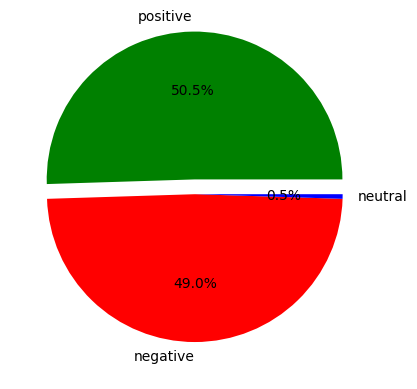

In [36]:
# calculate the percentage of each type of sentiment score
sentiment_type_percentages = cleaned_df['sentiment_type'].value_counts(normalize=True) * 100
#Create a piechart
fig, ax = plt.subplots()
ax.pie(
    sentiment_type_percentages,
    labels=sentiment_type_percentages.index,
    colors=['green', 'red', 'blue'],
    explode=[0.1, 0, 0],
    autopct='%1.1f%%'
)
plt.savefig('data/reviews.png')
plt.show()

## Interpretation of sentiment results
Out of the 1000 reviews analyzed
505 were positive
490 were negative
50 were neutral
A slight majority of the reviewers seemed to have positive reviews.

In [26]:
#Save cleaned data into new CSV
cleaned_df.to_csv('data/sentiment_BA.csv')

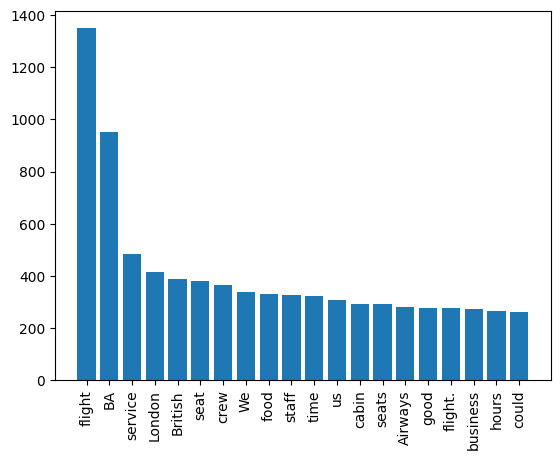

In [37]:
#Topic modeling  to show what people are activelly talking 
# about staff and the general experience with BA
reviews = cleaned_df['reviews']

# Convert the reviews to a list of words
words = []
for review in reviews:
    words.extend(review.split())

# Filter out the stubborn stop words that don't want to disappear
stopwords = nltk.corpus.stopwords.words('english')
key_words = [word for word in words if word not in stopwords and word not in ['I', 'The','would','one','get','-']]

# Get the top 20 most used key words
word_counts = Counter(key_words)
top_20_words = word_counts.most_common(20)

# Filter out the stop words 
filtered_words = [
    (word, count) for word, count in top_20_words if word not in stopwords and word not in ['I', 'The','would','one','get','-']
    ]

# Get the labels and values for the histogram
labels, values = zip(*top_20_words)

# Create the histogram
plt.bar(labels, values)

# Set the x-axis labels to be vertical
plt.xticks(rotation=90)

plt.savefig('data/topic.png')
#Display the plot
plt.show()



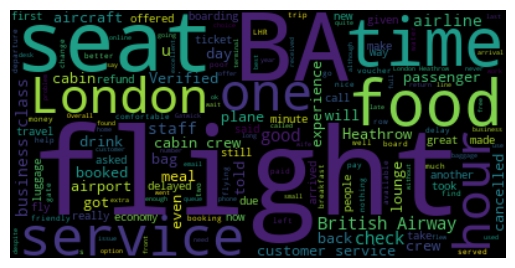

In [38]:
# Import the necessary libraries
from wordcloud import WordCloud
# Create the wordcloud
wordcloud = WordCloud(random_state=42).generate(' '.join(cleaned_df['reviews']))
# Show the word cloud
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.savefig('data/word.png')
plt.show()

## Topics
Based on the frequency chart above most people are talking about their experience with the flight crew and their satisfaction with the experience.